# Making an Aerosol Database


POSEIDON currently uses a precomputed aerosol database that stores aerosol Mie scattering properties in it, that retrievals can then pull from. 

This notebook will teach you whats precomputed for the database, how to add your own aerosols into the database, and how to change some assumptions that are currently in the code. 

# NOTE

As of POSEIDON V1.3.1 the aerosol database code has been overhauled. The new changes will be documented below. 

## Mie Aerosol Types

Aerosols in the database are computed from the refractive indices found in 
- Wakeford & Sing 2014 (https://ui.adsabs.harvard.edu/abs/2015A%26A...573A.122W/abstract)
- Kitzmann & Heng 2017 (https://ui.adsabs.harvard.edu/abs/2018MNRAS.475...94K/abstract)
- gcmCRT (https://ui.adsabs.harvard.edu/abs/2022ApJ...929..180L/abstract)
- Burningham 2021 (https://ui.adsabs.harvard.edu/abs/2021MNRAS.506.1944B/abstract)
- optool (https://ui.adsabs.harvard.edu/abs/2021ascl.soft04010D/abstract)
- Misc (see Mullens et al. 2024)
- Database of Optical Constants for Cosmic Dust (DOCCD, https://www2.astro.uni-jena.de/Laboratory/OCDB/index.html)

Each aerosol in the database has their effective extinction cross section ($\sigma_{eff,ext}$), effective absorption cross section ($\sigma_{eff,abs}$), effective scattering cross section ($\sigma_{eff,scat}$), effective back scattering cross section ($\sigma_{eff,back}$), effective asymmetry parameter ($g$), and effective single scattering albedo ($\omega$) calculated covering wavelengths from 0.2 to 30 um and particle sizes 0.001 to 10 um (log -3 to 1). 

Particles are assumed to be in a log normal distribution with a log width of 0.5 centered around the particle size recorded in the database. 
Aerosols are given a cross section of 0 in regions where refractive index lab data did not span the full 0.2-30 um. 

Cross sections were computed via the python miepython package (V2.5.5)
- miepython (https://miepython.readthedocs.io/en/2.5.5/)

POSEIDON also includes the python implementation of LX-MIE, which includes the Platon implementation and functional forms from PyMieScatt
- LX-MIE Algorithm (Kitzmann & Heng 2017, https://ui.adsabs.harvard.edu/abs/2018MNRAS.475...94K/abstract)
- PLATON Aerosol Implementation (Zhang et al 2018, https://ui.adsabs.harvard.edu/abs/2019PASP..131c4501Z/abstract)
- PyMieScatt Mie Efficiences (https://pymiescatt.readthedocs.io/en/latest/forward.html)

For more details, see Mullens 2024 (https://ui.adsabs.harvard.edu/abs/2024ApJ...977..105M/abstract). (For more details on refractive index files, see aerosol_database_readme.txt, https://poseidon-retrievals.readthedocs.io/en/latest/_static/Aerosol-Database-Readme.txt)

## POSEIDON Aerosol Database(s)

POSEIDON comes with three precomputed aerosol databases: 

1. The normal aerosol database (aerosol_database.hdf5), as detailed in https://poseidon-retrievals.readthedocs.io/en/latest/content/opacity_database.html#aerosol-database
- This precomputed database is included with an install of POSEIDON (as of V1.2)
- With V1.3.1., you will need to redownload the new database, which has been updated to include more accurate scattering properties 

2. The directional aerosol database (aerosol_directional_database.hdf5) (optional, see aerosol_directionality.ipynb)

3. The SiO2 aerosol database (with lognormal width as a free parameter, SiO2_free_logwidth_database.hdf5) (optional, see advanced below)

POSEIDON v1.2 and onwards comes with a precomputed aerosol database. 

Using the tutorial below, you can add your own aerosols to the database by precomputing their optical properties. After generating the optical properties, you can regenerate the database by: 

1. Putting all relevant jumbo_Mie.npy files in the aerosol_Mie_properties folder in the inputs/opacity folder. (all precomputed jumbo files are available on google drive: ADD LINK HERE)
2. Running the following code below

WARNING: Do not run the following code unless you want to remake the aerosol_database.hdf5 file. If you want to keep the originally installed file, you will need to move or rename the file first so that its not overwritten. 

All jumbo files in the normal aerosol database assume a lognormal distribtion with a logwidth of 0.5. To change this assumption, see the advanced section below. 

In [ ]:
from POSEIDON.clouds import make_aerosol_database

make_aerosol_database()

### Querying the Aerosol Database 

Lets check the available species in the database.

In [1]:
from POSEIDON.supported_chemicals import aerosol_supported_species

print(aerosol_supported_species)

['ADP' 'Al2O3' 'Al2O3_KH' 'C' 'CH4_liquid' 'CH4_solid' 'CaTiO3'
 'CaTiO3_KH' 'Cr' 'ExoHaze_1000xSolar_300K' 'ExoHaze_1000xSolar_400K' 'Fe'
 'Fe2O3' 'Fe2SiO4_KH' 'FeO' 'FeS' 'FeSiO3' 'H2O' 'H2O_ice' 'H2SO4'
 'Hexene' 'Hibonite' 'IceTholin' 'KCl' 'Mg2SiO4_amorph_sol_gel'
 'Mg2SiO4_amorph' 'Mg2SiO4_Fe_poor' 'Mg2SiO4_Fe_rich'
 'Mg2SiO4_crystalline' 'Mg4Fe6SiO3_amorph_glass' 'Mg5Fe5SiO3_amorph_glass'
 'Mg8Fe12SiO4_amorph_glass' 'Mg8Fe2SiO3_amorph_glass' 'MgAl2O4'
 'MgFeSiO4_amorph_glass' 'MgO' 'MgSiO3_amorph' 'MgSiO3_crystalline'
 'MgSiO3' 'MgSiO3_amorph_glass' 'MgSiO3_sol_gel' 'MnS' 'MnS_KH' 'MnS_Mor'
 'Na2S' 'NaCl' 'NanoDiamonds' 'NH3' 'NH4SH' 'S8' 'Saturn-Phosphorus-Haze'
 'SiC' 'SiO' 'SiO2' 'SiO2_amorph' 'SiO2_crystalline_2023'
 'SiO2_alpha_palik' 'SiO2_glass_palik' 'Soot' 'Soot_6mm' 'Tholin'
 'Tholin-CO-0625' 'Tholin-CO-1' 'TiC' 'TiO2_anatase' 'TiO2_rutile' 'VO'
 'ZnS']


Lets query the normal aerosol database directly.

In [7]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 

species = 'MgSiO3'

# Intialize wavelength grid
wl_min = 0.2    # Minimum wavelength (um)
wl_max = 30      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
aerosol_grid = load_aerosol_grid([species])

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = 0.01

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, [r_m], [species],)

# Lets load in the extinction cross section, asymmetry parameter, and single scattering albedo 
eff_ext = sigma_Mie_interp_array[species]['eff_ext']
eff_w = sigma_Mie_interp_array[species]['eff_w']
eff_g = sigma_Mie_interp_array[species]['eff_g']

Reading in database for aerosol cross sections...


We will plot the effective extinction cross section, single scattering albedo, and asymmetry parameter. 

Note that while the aerosol grid also includes the absorption cross section, the scattering scross section, and the back scattering cross section, only the three parameters listed above are used in POSEIDON's radiative transfer calculations. 

The effective extinction cross section is the total loss of photons due to scattering and absorption processes.

The single scattering albedo ($\omega$) describes how 'forward-scattering' an aerosol is. 0 = Rayleigh limit (isotropic scattering) vs 1 = Forward Scattering. 

The asymmetry parameter ($g$) describes if an aerosol acts primarily as an absorber or a scatterer (0 = completely absorbs, 1 = completely scatters). This parameter can go negative, which means that its 'adding' photos back into the beam. 

$\omega$ and $g$ are used in emission geometries where multiple and forwarding scattering processes are important to consider. 

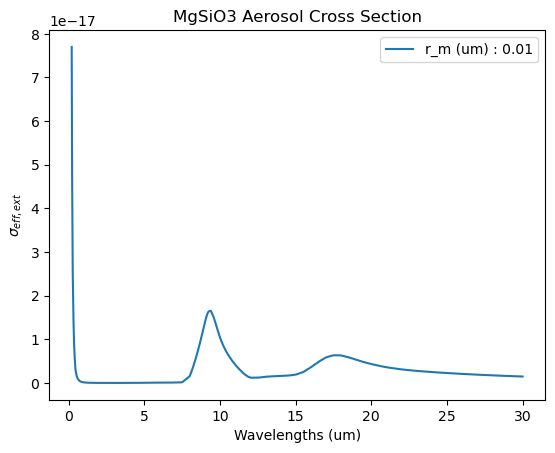

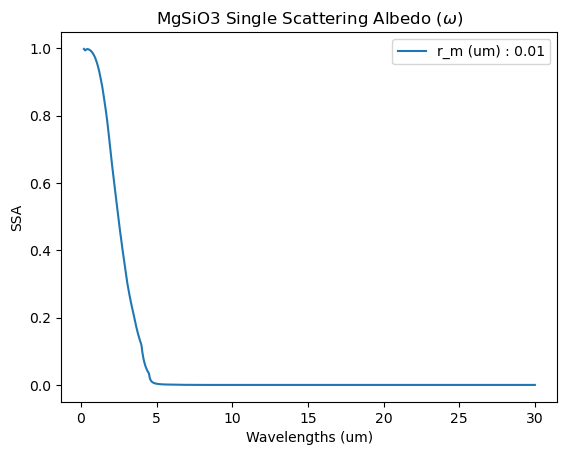

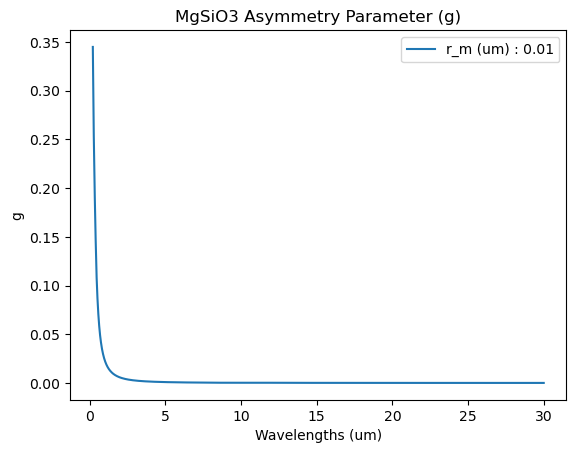

In [9]:
label = 'r_m (um) : ' + str(r_m)
title = species + ' Aerosol Cross Section'

plt.plot(wl,eff_ext, label = label)
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('$\sigma_{eff,ext}$')
plt.show()

title = species + ' Single Scattering Albedo ($\omega$)'
plt.plot(wl,eff_w, label = label)
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('SSA')
plt.show()


title =species + ' Asymmetry Parameter (g)'
plt.plot(wl,eff_g, label = label)
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('g')
plt.show()

There also exists a funciton to plot out a 'snapshot' of aerosol properties for an aerosol in the database. 

MgSiO3
Reading in database for aerosol cross sections...
Loading in :  ../../../POSEIDON/reference_data/refractive_indices_txt_files/File_names_corresponding_to_name_in_supported_species/MgSiO3.txt
Loading in :  ../../../POSEIDON/reference_data/refractive_indices_txt_files/File_names_corresponding_to_name_in_supported_species/MgSiO3.txt


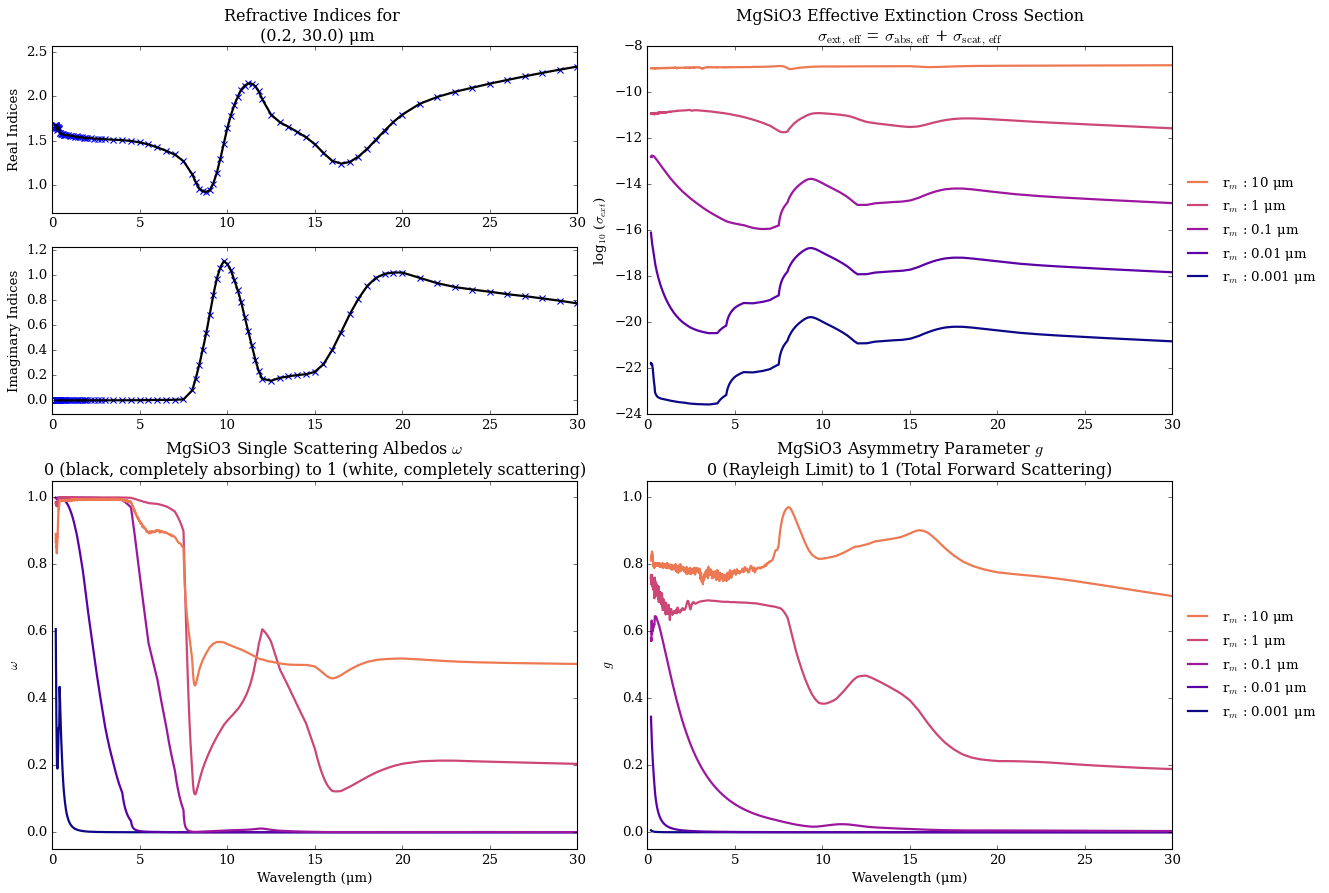

In [10]:
from POSEIDON.clouds import database_properties_plot

# All the refractive index txt files with names corresponding to their name in supported_species.py are
# found in /refractive_indices_txt_files/File_names_corrsponding_to_name_in_supported_species/

file_name = '../../../POSEIDON/reference_data/refractive_indices_txt_files/File_names_corresponding_to_name_in_supported_species/MgSiO3.txt'

database_properties_plot(file_name)

## Adding an Aerosol to the Database

This option is reccomended if retrievals will be run using some aerosol lab data. 

POSEIDON has two options for precomputing cross sections for one aerosol:
1. LX-MIE algorithm 
2. miepython algorithm 

The LX-MIE algorithm is hard coded into POSEIDON, and therefore does not require an external installation. However, it is not parallalized and therefore can be slow. 
The miepython algorithm requires an installation of miepython V2.5.5 (see their documentation for installation instructions). However, this code is parallalized an be run on multiple cores. 

Before precomputing the aerosol properties, you can compare computed the cross sections between the two algorithms using the following code: 

Loading in :  ../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/H2O_complex.txt


[]

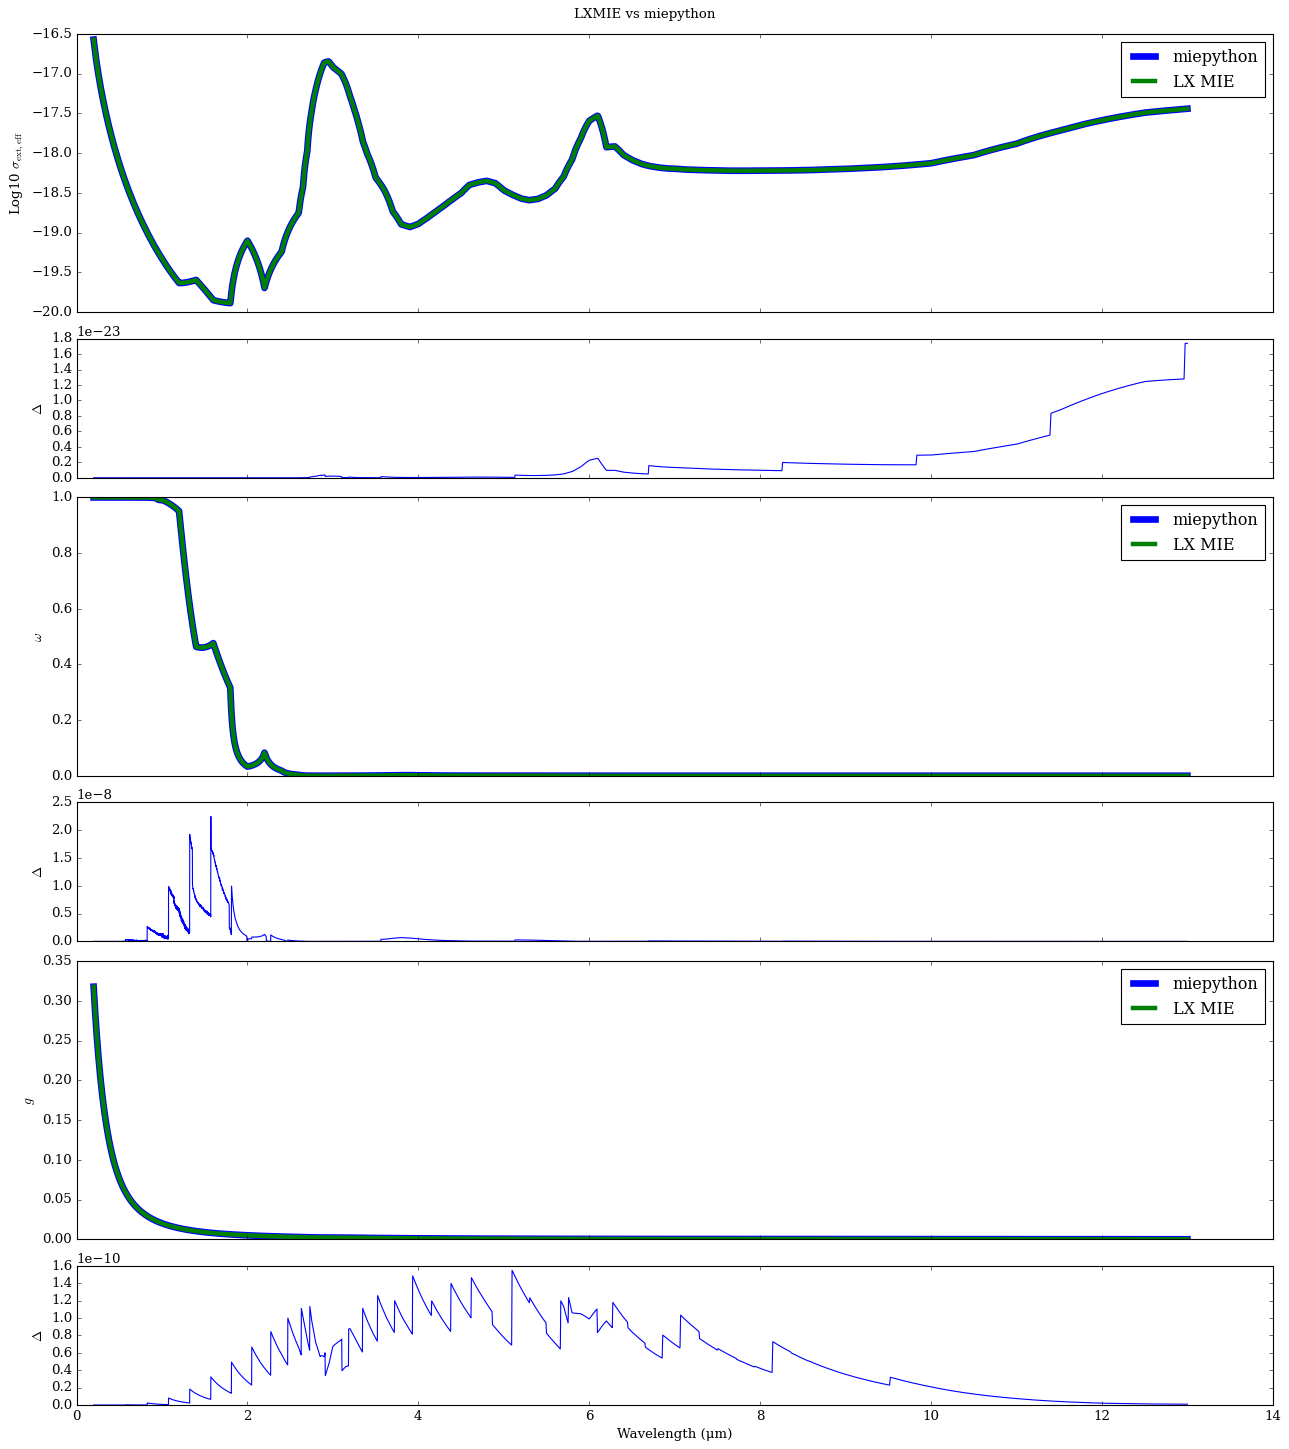

In [22]:
from POSEIDON.clouds import precompute_cross_sections_from_indices_miepython, precompute_cross_sections_from_indices_LXMIE
from POSEIDON.clouds import load_refractive_indices_from_file
from POSEIDON.core import wl_grid_constant_R
import numpy as np

# Initialise wavelength grid
wl_min = 0.2      # Minimum wavelength (um)
wl_max = 13.0     # Maximum wavelength (um)
R = 10000         # Spectral resolution of grid (R = wl/dwl)

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Wavelength grid that Mie properties will be computed on 
wl_Mie = wl_grid_constant_R(wl[0], wl[-1], 1000)

# Preload the refractive indices from the file 
refractive_index_path = '../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/'
file_name = refractive_index_path + 'H2O_complex.txt'

r_i_real, r_i_complex = load_refractive_indices_from_file(wl, file_name) # <---- Load in the real and imaginary indices

# Lets look at a mean particle radius of 1e-2 microns
r_m = 1e-2

# Precompute the cross sections
eff_ext_cross_section_mp, eff_scat_cross_section_mp, eff_abs_cross_section_mp, eff_back_cross_section_mp, eff_w_mp, eff_g_mp = precompute_cross_sections_from_indices_miepython(wl,r_i_real,r_i_complex, r_m)
eff_ext_cross_section_lx, eff_scat_cross_section_lx, eff_abs_cross_section_lx, eff_back_cross_section_lx, eff_w_lx, eff_g_lx = precompute_cross_sections_from_indices_LXMIE(wl,r_i_real,r_i_complex, r_m)

# Lets plot the differences between the two algorithms 
import matplotlib.pyplot as plt 

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9*2))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    A
    A
    B
    C
    C
    D
    E
    E
    F
    """
)

axd['A'].plot(wl_Mie, np.log10(eff_ext_cross_section_mp), label = 'miepython', lw = 6)
axd['A'].plot(wl_Mie, np.log10(eff_ext_cross_section_lx), label = 'LX MIE', lw = 4)
axd['A'].set_ylabel('Log10 $\sigma_{\mathrm{ext,eff}}$')
axd['A'].set_xticklabels([])
axd['A'].legend()

axd['B'].plot(wl_Mie, np.abs(eff_ext_cross_section_mp-eff_ext_cross_section_lx))
axd['B'].set_ylabel('$\Delta$')
axd['B'].set_xticklabels([])

axd['C'].plot(wl_Mie, eff_w_mp, label = 'miepython', lw = 6)
axd['C'].plot(wl_Mie, eff_w_lx, label = 'LX MIE', lw = 4)
axd['C'].set_ylabel('$\omega$')
axd['C'].set_xticklabels([])
axd['C'].legend()

axd['D'].plot(wl_Mie, np.abs(eff_w_mp-eff_w_lx))
axd['D'].set_ylabel('$\Delta$')
axd['D'].set_xticklabels([])

axd['E'].plot(wl_Mie, eff_g_mp, label = 'miepython', lw = 6)
axd['E'].plot(wl_Mie, eff_g_lx, label = 'LX MIE', lw = 4)
axd['E'].set_ylabel('$g$')
axd['E'].set_xticklabels([])
axd['E'].legend()

axd['F'].plot(wl_Mie, np.abs(eff_g_mp-eff_g_lx))
axd['F'].set_ylabel('$\Delta$')
axd['F'].set_xlabel('Wavelength (μm)')

plt.suptitle('LXMIE vs miepython')
plt.plot()

To add your own refractive index lab data to the database for personal use, run one of the following codes below 

We reccomend writing a .py script and running this command alone in a terminal.

Ensure that the refractive index txt have the two first lines being a header, or that the headers are commented out with '#'.

The first column being wavelengths (um), second column being the real indices, and the third column being the imaginary indices.

If your lab data is in wavenumber, make sure to convert using wavelength (um) = 1e4/wavenumber (cm-1)

The jumbo_Mie.npy file will be saved in the /inputs/opacity/aerosol_Mie_properties folder

If you want all auxiliary files (ext_abs, ext_scat, ext_back, ext_g, and ext_w) saved in /inputs/opacity/precomputed_Mie_properties folder, set saveall = True

To add your aerosol to the database, place all the jumbo_Mie .npy files you want in the database in the /inputs/opacity/aerosol_Mie_properties folder and rerun make_aerosol_database().

Make sure to update supported_chemicals.py

1. miepython algorithm (reccomended)

It is possible to run the miepython on multiple cores. Make sure to run it in a py script if you change the number_cores argument below. 

The rest of the optional arguments below listed are the default settings (particle sizes from 1e-3 to 10 um are computed with a lognormal distribution with a log width of 0.5, only the jumbo_Mie.npy file is saved in the aerosol_Mie_properties folder)

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_miepython

# Preload the refractive indices from the file 
refractive_index_path = '../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/'
file_name = refractive_index_path + 'H2O_complex.txt'

# Precompute the cross ssections
precompute_cross_sections_one_aerosol_miepython(file_name, 'H2O',
                                                 log_r_m_std_dev = 0.5,
                                                 number_cores = 1,
                                                 log_r_m_min = -3,
                                                 log_r_m_max = 1,
                                                 saveall = False)

2. LX-Mie algorithm

It is not possible to run this on multiple cores. 

As above, this function assumes the default settings (particle sizes from 1e-3 to 10 um are computed with a lognormal distribution with a log width of 0.5, only the jumbo_Mie.npy file is saved in the aerosol_Mie_properties folder)

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_LXMIE

# Preload the refractive indices from the file 
refractive_index_path = '../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/'
file_name = refractive_index_path + 'H2O_complex.txt'

# Takes in the file name with the path to it, and the name you want the aerosol to have in the database
precompute_cross_sections_one_aerosol_LXMIE(file_name, 'H2O', saveall = False)

Here are a few good resources for finding refractive indices: 

Database of Optical Constants for Cosmic Dust (DOCCD) (https://www.astro.uni-jena.de/Laboratory/OCDB/index.html)

The Cosmic Ice Laboratory (https://science.gsfc.nasa.gov/691/cosmicice/constants.html)

The Optical Constants Database (https://ocdb.smce.nasa.gov/#:~:text=The%20Optical%20Constants%20database%20(OCdb,and%20interpretation%20of%20observational%20data)

Handbook of Optical Constants of Solids (textbook by Edward D. Palik)

Kitzmann & Heng (2018) (https://github.com/NewStrangeWorlds/LX-MIE/tree/master/compilation)

gCMCRT (https://github.com/ELeeAstro/gCMCRT/tree/main/data/nk_tables)

optool (https://github.com/cdominik/optool/tree/master/lnk_data)

POSEIDON (https://github.com/MartianColonist/POSEIDON/tree/Elijah_V12/refractive_indices_txt_files/Misc)

## Changing Aerosol Assumptions (Advanced)

1. Changing the particle size distribution width
2. Changing the min and max particle sizes claculated

In this section, we will look at how to change some assumptions that are 'baked' into POSEIDON when precomputing aerosol properties. 

### 1. Changing Particle Size Distribution 

Currrently, POSEIDON assumes a log-normal particle size distribution with a width of 0.5, where the individual points on the plot below represent the sides that are integrated over. 

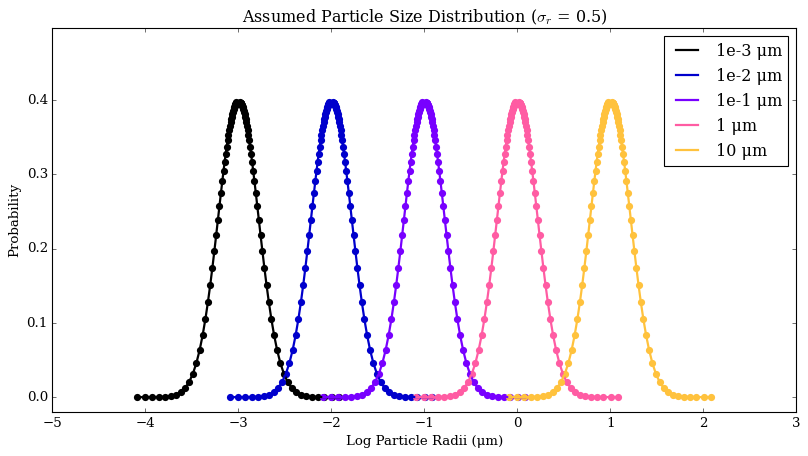

In [1]:
from POSEIDON.clouds import plot_lognormal_distribution

plot_lognormal_distribution()

However, one might want to explore a different width of the distribution (i.e. to 1 or 0.1 instead of 0.5).

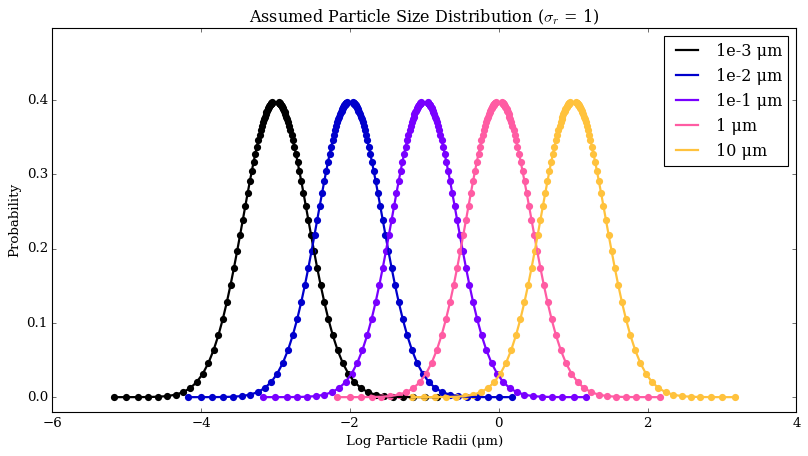

In [2]:
from POSEIDON.clouds import plot_lognormal_distribution

plot_lognormal_distribution(r_m_std_dev = 1)

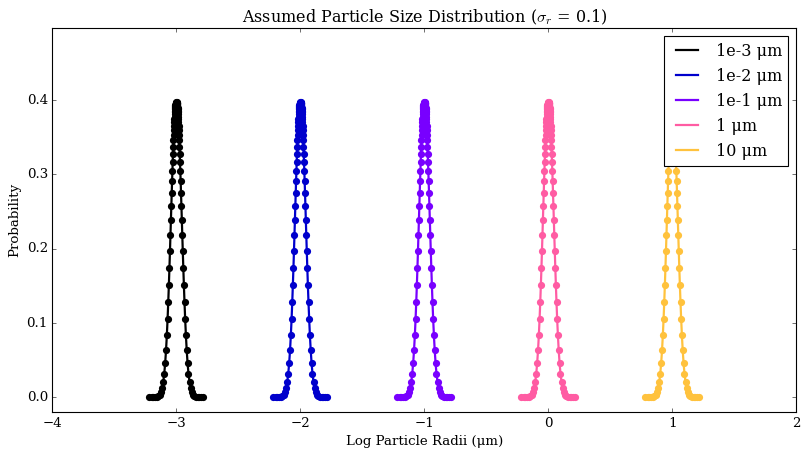

In [3]:
from POSEIDON.clouds import plot_lognormal_distribution

plot_lognormal_distribution(r_m_std_dev = 0.1)

There are to ways to compute different log width distributions. 

Note that the jumbo npy file will save with the assumed logwidth distribution in the name. 

WARNING: Mie algorithms not optimized for large particle sizes, and therefore larger particle size distributions will take substantially longer to precompute. 

1. miepython algorithm (reccomended)

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_miepython

# Preload the refractive indices from the file 
refractive_index_path = '../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/'
file_name = refractive_index_path + 'H2O_complex.txt'

# Precompute the cross ssections
precompute_cross_sections_one_aerosol_miepython(file_name, 'H2O',
                                                 log_r_m_std_dev = 1.0, #<----- Change log_r_m_std_dev
                                                 number_cores = 1,
                                                 log_r_m_min = -3,
                                                 log_r_m_max = 1,
                                                 saveall = False)

2. LX-MIE algorithm 

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_custom_LXMIE

precompute_cross_sections_one_aerosol_custom_LXMIE(file_name, 'H2O',
                                                 log_r_m_std_dev = 1,   #<----- Change log_r_m_std_dev
                                                 log_r_m_min = -3,
                                                 log_r_m_max = 1,
                                                 saveall = False)

As of POSEIDON 1.3.1., you can have the lognormal distribution be a free parameter in forward models and retrievals. 

We have included this option for only one aerosol, SiO2.

Before running the following cells, make sure you have downloaded the 'SiO2_free_logwidth_database.hdf5' file and placed in inputs/opacity folder.

We will first show how this aerosol_database works, as well as use it in a quick forward model. 

Then we will show how to make your own. 


In [27]:
from POSEIDON.supported_chemicals import aerosols_lognormal_logwidth_free

print('Aerosols where log_r_m_std_dev can be a free parameter:')
print(aerosols_lognormal_logwidth_free)

# The precomputed database has the following log_r_m_std_dev's precomputed 
# Goes from log_r_m_std_dev = 0.01 to 1.43
log_r_m_std_dev_array = np.linspace(0.01,1.5,50)
log_r_m_std_dev_array[16] = 0.5
log_r_m_std_dev_array = log_r_m_std_dev_array[:-2]

print()
print('Log r_m_std_dev precomputed:')
print(log_r_m_std_dev_array)

Aerosols where log_r_m_std_dev can be a free parameter:
['SiO2']

Log r_m_std_dev precomputed:
[0.01       0.04040816 0.07081633 0.10122449 0.13163265 0.16204082
 0.19244898 0.22285714 0.25326531 0.28367347 0.31408163 0.3444898
 0.37489796 0.40530612 0.43571429 0.46612245 0.5        0.52693878
 0.55734694 0.5877551  0.61816327 0.64857143 0.67897959 0.70938776
 0.73979592 0.77020408 0.80061224 0.83102041 0.86142857 0.89183673
 0.9222449  0.95265306 0.98306122 1.01346939 1.04387755 1.07428571
 1.10469388 1.13510204 1.1655102  1.19591837 1.22632653 1.25673469
 1.28714286 1.31755102 1.34795918 1.37836735 1.40877551 1.43918367]


In [29]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid
import matplotlib.pyplot as plt 
import numpy as np

species = ['SiO2']

# Intialize wavelength grid
wl_min = 0.2    # Minimum wavelength (um)
wl_max = 30      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
grid_name = 'SiO2_free_logwidth'
aerosol_grid = load_aerosol_grid(species, grid = grid_name,
                                lognormal_logwith_free = True)

# Test 0.01 um as the mean particle radii
r_m = [0.01]

# This function loads in the grid 
sigma_Mie_interp_array_01 = interpolate_sigma_Mie_grid(aerosol_grid, wl, r_m, species,
                                                       lognormal_logwith_free = True,
                                                       log_r_m_std_dev = 0.1)

sigma_Mie_interp_array_05 = interpolate_sigma_Mie_grid(aerosol_grid, wl, r_m, species,
                                                       lognormal_logwith_free = True,
                                                       log_r_m_std_dev = 0.5)

sigma_Mie_interp_array_1 = interpolate_sigma_Mie_grid(aerosol_grid, wl, r_m, species,
                                                       lognormal_logwith_free = True,
                                                       log_r_m_std_dev = 1.0)

# Lets load in the cross sections of each distribution
eff_ext_SiO2_1 = sigma_Mie_interp_array_01['SiO2']['eff_ext']
eff_ext_SiO2_05 = sigma_Mie_interp_array_05['SiO2']['eff_ext']
eff_ext_SiO2_01 = sigma_Mie_interp_array_1['SiO2']['eff_ext']

Reading in database for aerosol cross sections...


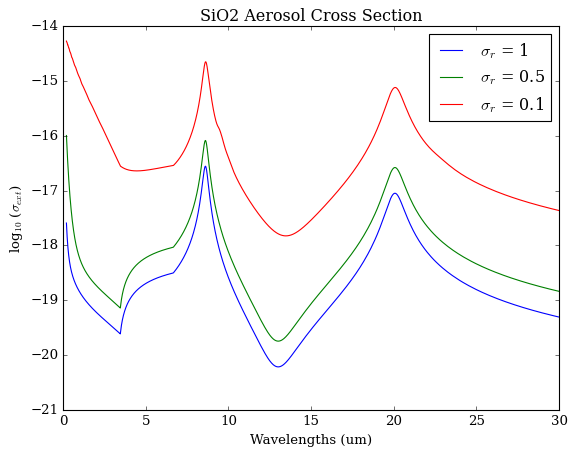

In [30]:
title = 'SiO2 Aerosol Cross Section'

plt.plot(wl,np.log10(eff_ext_SiO2_1), label = '$\sigma_r$ = 1')
plt.plot(wl,np.log10(eff_ext_SiO2_05), label = '$\sigma_r$ = 0.5')
plt.plot(wl,np.log10(eff_ext_SiO2_01), label = '$\sigma_r$ = 0.1')
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('log$_{10}$ ($\sigma_{ext}$)')
plt.show()

You can use these in a forward model and retrieval as well: 

In [ ]:
from POSEIDON.constants import R_Sun, R_J
from POSEIDON.core import create_star, create_planet, load_data, define_model, \
                          wl_grid_constant_R, set_priors, read_opacities
from POSEIDON.visuals import plot_data, plot_spectra_retrieved, plot_PT_retrieved, \
                             plot_chem_retrieved
from POSEIDON.retrieval import run_retrieval
from POSEIDON.utility import read_retrieved_spectrum, read_retrieved_PT, \
                             read_retrieved_log_X, plot_collection
from POSEIDON.corner import generate_cornerplot

import numpy as np

from scipy.constants import parsec as pc

#***** Model wavelength grid *****#

wl_min = 0.2     # Minimum wavelength (um)          0.55
wl_max = 13      # Maximum wavelength (um)          3.00
R = 10000         # Spectral resolution of grid      

# We need to provide a model wavelength grid to initialise instrument properties
wl = wl_grid_constant_R(wl_min, wl_max, R)

#***** Define stellar properties *****#

R_s = 1.49*R_Sun      # Stellar radius (m)
T_s = 6550.0          # Stellar effective temperature (K)
err_T_s = 100         # Value in ExoMast
Met_s = -0.25         # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.2         # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s, T_eff_error = err_T_s, 
                   stellar_grid = 'phoenix', wl = wl)

#***** Define planet properties *****#

planet_name = 'WASP-17b'  # Planet name used for plots, output files etc.

R_p = 1.87*R_J      # Planetary radius (m)
log_g_p = 2.7426    # Gravitational field of planet (m/s^2)
T_eq = 1699         # Equilibrium temperature (K)
d = 405.91*pc       # Distance to system (m)

# Create the planet object
planet = create_planet(planet_name, R_p, log_g = log_g_p, T_eq = T_eq, d = d)

#***** Specify data location and instruments *****#

stellar_contam = None

#***** Define model *****#

model_name = 'SiO2_logwidth_free'

bulk_species = ['H2', 'He']     # H2 + He comprises the bulk atmosphere
param_species = ['H2O']

aerosol_species = ['SiO2']
model_logwidth_free = define_model(model_name, bulk_species, param_species, 
                     PT_profile = 'isotherm',
                     cloud_model = 'Mie', cloud_type = 'slab',
                     aerosol_species = aerosol_species,
                     lognormal_logwidth_free = True #<----- set lognormal_logwidth_free to True 
                     )

print(model_logwidth_free['param_names'])

Reading in database for aerosol cross sections...
['R_p_ref' 'T' 'log_H2O' 'log_P_top_slab_SiO2' 'Delta_log_P_SiO2'
 'log_r_m_SiO2' 'log_X_SiO2' 'log_rm_std_dev_SiO2']


In [32]:
from POSEIDON.core import read_opacities
from POSEIDON.core import define_model

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 1200     # Same as prior range for T
T_fine_max = 1300    # Same as prior range for T
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

#***** Specify fixed atmospheric settings for retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-8   # 10 nbar
P_max = 100       # 10 bar
N_layers = 100   # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

# Now we can pre-interpolate the sampled opacities (may take up to a minute)
opac = read_opacities(model_logwidth_free, wl, opacity_treatment, T_fine, log_P_fine)

Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
H2O done
Opacity pre-interpolation complete.


In [35]:
R_p_ref             =   1.69 * R_J
T                   =   1271.9
log_H2O             =   -2.96 
log_P_top_slab_SiO2 =   -6.60
Delta_log_P_SiO2    =   1.96 
log_r_m_SiO2        =   -1.85
log_X_SiO2          =   -11.23

In [36]:
from POSEIDON.core import make_atmosphere

PT_params = np.array([T])
log_X_params = np.array([log_H2O])

log_r_m_std_dev_SiO2 = 0.01

cloud_params = np.array([log_P_top_slab_SiO2, Delta_log_P_SiO2, log_r_m_SiO2, log_X_SiO2, log_r_m_std_dev_SiO2])

atmosphere_logwidth_001 = make_atmosphere(planet, model_logwidth_free, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

log_r_m_std_dev_SiO2 = 0.5

cloud_params = np.array([log_P_top_slab_SiO2, Delta_log_P_SiO2, log_r_m_SiO2, log_X_SiO2, log_r_m_std_dev_SiO2])

atmosphere_logwidth_05 = make_atmosphere(planet, model_logwidth_free, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

log_r_m_std_dev_SiO2 = 0.7

cloud_params = np.array([log_P_top_slab_SiO2, Delta_log_P_SiO2, log_r_m_SiO2, log_X_SiO2, log_r_m_std_dev_SiO2])

atmosphere_logwidth_07 = make_atmosphere(planet, model_logwidth_free, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

In [37]:
from POSEIDON.core import compute_spectrum

# Generate our transmission spectra

spectrum_logwidth_001 = compute_spectrum(planet, star, model_logwidth_free, atmosphere_logwidth_001, opac, wl,
                            spectrum_type = 'transmission')

spectrum_logwidth_05 = compute_spectrum(planet, star, model_logwidth_free, atmosphere_logwidth_05, opac, wl,
                            spectrum_type = 'transmission')

spectrum_logwidth_07 = compute_spectrum(planet, star, model_logwidth_free, atmosphere_logwidth_07, opac, wl,
                            spectrum_type = 'transmission')

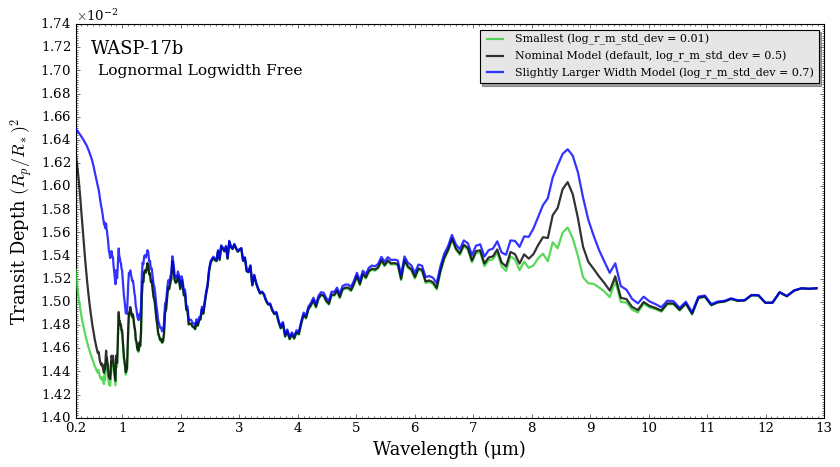

In [38]:
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

spectra = []
spectra = plot_collection(spectrum_logwidth_001, wl, collection = spectra)
spectra = plot_collection(spectrum_logwidth_05, wl, collection = spectra)
spectra = plot_collection(spectrum_logwidth_07, wl, collection = spectra)

fig = plot_spectra(spectra, planet,
                   plt_label ='Lognormal Logwidth Free',
                   plot_full_res = False, R_to_bin = 100, 
                   figure_shape = 'wide',
                   spectra_labels = ['Smallest (log_r_m_std_dev = 0.01)','Nominal Model (default, log_r_m_std_dev = 0.5)', 'Slightly Larger Width Model (log_r_m_std_dev = 0.7)', ],
                   colour_list = ['limegreen','black', 'blue'],
                   wl_axis = 'linear',
                   )

If you wish for another species to have log_r_m_std_dev to be a free variable, follow these following steps (apologies this isn't more streamlined, feel free to reach out to Elijah Mullens with any questions): 

1. Loop over the precompute function with log_r_m_std_dev equal to each point in the array defined above: 

log_r_m_std_dev_array = np.linspace(0.01,1.5,50)

log_r_m_std_dev_array[16] = 0.5

log_r_m_std_dev_array = log_r_m_std_dev_array[:-2]

NOTE: This is the log_r_m_std_dev array that POSEIDON assumes in load_aerosol_grid() by default.

2. Run make_database() with only the jumbo.npy files generated from part 1

3. Rename the resultant hdf5 'aerosol name' + '_free_logwidth_database.hdf5'.

4. In supported_chemicals.py, add the aerosol name to the list 'aerosols_lognormal_logwidth_free'

### 2. Changing mean radii computed 

The assumed min and max radius is 1e-3 and 10 um, respectively. If one wishes, they can precomputed radii beyond that range utilizing the same functions as above

However, the current make_aersosol_database() function does assume that r_m ranges from 1e-3 to 10 um. If a user wishes to define their own grid bounds and use it in retrievals, feel free to reach out to the developers for more information.

But the way you would do it is: 

1. Change the r_m_array in make_aerosol_database() in clouds.py (or just make a new function from that one)
2. Make new database with new name 
3. In define_model() in core.py, add an optional argument where you can change which grid is loaded in 
4. Still in core.py, find where the aerosol grid is loaded in and make a few fancy if statements depending on the optional argument
5. Go to load_aerosol_grid() in clouds.py and edit so it knows how and where to open your new grid

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_custom_LXMIE, precompute_cross_sections_from_indices_miepython

# Preload the refractive indices from the file 
refractive_index_path = '../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/'
file_name = refractive_index_path + 'H2O_complex.txt'

precompute_cross_sections_one_aerosol_custom_LXMIE(file_name, 'H2O_1e-4_100um',
                                                 log_r_m_std_dev = 0.5,  
                                                 log_r_m_min = -4,       #<----- Change log_r_m_min
                                                 log_r_m_max = 2,        #<----- Change log_r_m_max
                                                 saveall = False)


## or ##


precompute_cross_sections_one_aerosol_miepython(file_name, 'H2O',
                                                 log_r_m_std_dev = 0,5, 
                                                 number_cores = 1,   
                                                 log_r_m_min = -4,   #<----- Change log_r_m_min
                                                 log_r_m_max = 2,    #<----- Change log_r_m_max
                                                 saveall = False)

We can take a look at what smaller and larger particle sizes look like by using this helper function 

Loading in :  ../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/H2O_complex.txt


Text(0.5, 0, 'Wavelength (μm)')

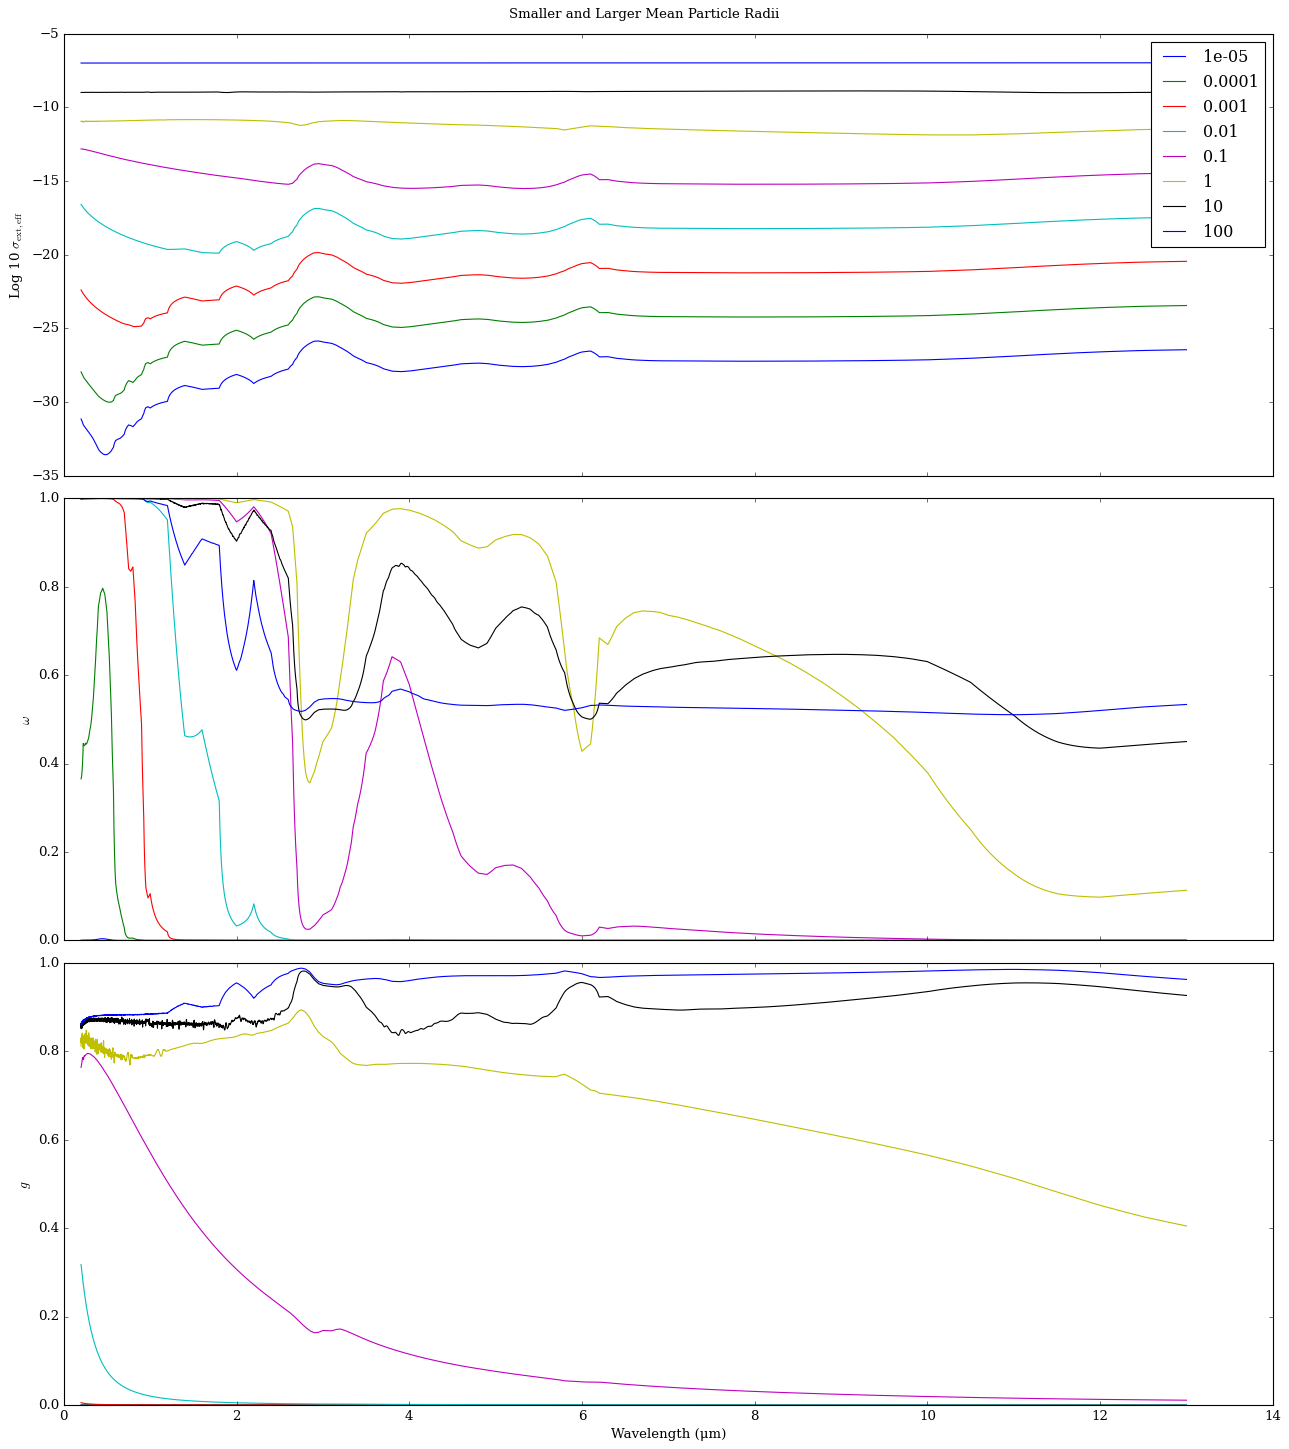

In [39]:
from POSEIDON.clouds import precompute_cross_sections_from_indices_miepython, precompute_cross_sections_from_indices_LXMIE
from POSEIDON.clouds import load_refractive_indices_from_file
from POSEIDON.core import wl_grid_constant_R
import numpy as np

# Initialise wavelength grid
wl_min = 0.2      # Minimum wavelength (um)
wl_max = 13.0     # Maximum wavelength (um)
R = 10000         # Spectral resolution of grid (R = wl/dwl)

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Wavelength grid that Mie properties will be computed on 
wl_Mie = wl_grid_constant_R(wl[0], wl[-1], 1000)

# Preload the refractive indices from the file 
refractive_index_path = '../../../POSEIDON/reference_data/refractive_indices_txt_files/WS15/'
file_name = refractive_index_path + 'H2O_complex.txt'

r_i_real, r_i_complex = load_refractive_indices_from_file(wl, file_name) # <---- Load in the real and imaginary indices

# Lets look at different mean radii
import matplotlib.pyplot as plt 

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9*2))  

# Create layout
axd = fig_combined.subplot_mosaic(
    """
    A
    B
    C
    """
)

r_m_array = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

for r_m in r_m_array:

    eff_ext_cross_section_mp, _, _, _, eff_w_mp, eff_g_mp = precompute_cross_sections_from_indices_miepython(wl,r_i_real,r_i_complex, r_m)

    axd['A'].plot(wl_Mie, np.log10(eff_ext_cross_section_mp), label = str(r_m))
    axd['B'].plot(wl_Mie, eff_w_mp, label = str(r_m))
    axd['C'].plot(wl_Mie, eff_g_mp, label = str(r_m))

plt.suptitle('Smaller and Larger Mean Particle Radii')
axd['A'].set_ylabel('Log 10 $\sigma_{\mathrm{ext,eff}}$')
axd['A'].set_xticklabels([])
axd['A'].legend()
axd['B'].set_ylabel('$\omega$')
axd['B'].set_xticklabels([])
axd['C'].set_ylabel('$g$')
axd['C'].set_xlabel('Wavelength (μm)')

### Extra - Mie calculations and Distribution 

The LX-Mie algorithm assumes spherical, homogenous particles. Feel free to go into precompute_cross_sections_one_aerosol() in clouds.py and input your own aerosol property computing code (i.e., distribution of hollow spheres (DHS), oblate spherhoids, continous distribution of ellipsoidal shapes (CDE), fractal aggregates, etc.). Main thing is that the effective extinction coefficient is computed, as well as the asymmetry parameter and single scattering albedo. 

Additionally, feel free to go into that function and change the lognormal distribution to another distribution (potential exponential, Hansen distribution, etc). Any distribution of particles should work with the current LX-MIE algorithm, just change the following variables in the precompute_cross_sections_one_aerosol() function (LX-MIE just needs to know which radii to compute, and the integrals for the effective cross sections need to know geoemtric cross sections and probabilities)

        z = -np.logspace(np.log10(0.1), np.log10(z_max), int(num_integral_points/2)) 
        z = np.append(z[::-1], -z)

        probs = np.exp(-z**2/2) * (1/np.sqrt(2*np.pi))
        radii = r_m * np.exp(z * r_m_std_dev) # This takes the place of rm * exp(sigma z)
        geometric_cross_sections = np.pi * (radii*1e-6)**2 # Needs to be in um since its geometric